In [1]:
!pip install praw networkx matplotlib
!pip install --upgrade networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.5 MB/s eta 0:00:00


In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.link_prediction import resource_allocation_index

In [3]:
import numpy as np

In [4]:
import praw
import json

# Connect to Reddit
reddit = praw.Reddit(
    user_agent="Comment Extraction (by /u/MarianoMS56 )",
    client_id="Z1Q6jRqdkhNSsBIdNruTyw",
    client_secret="-RTg33uKcle5lwBfUKdQusaan4U0Lg"
)

# URL of the Reddit post
url = "https://www.reddit.com/r/Damnthatsinteresting/comments/1egrp4m/woman_saves_mans_life_with_narcan/"
submission = reddit.submission(url=url)

# Extract comments
posts = []
try:
    submission.comments.replace_more(limit=None)
    for top_level_comment in submission.comments:
        posts.append({
            "user": top_level_comment.author.name if top_level_comment.author else "Unknown",
            "body": top_level_comment.body,
            "parent_id": top_level_comment.parent_id
        })
        for reply in top_level_comment.replies:
            posts.append({
                "user": reply.author.name if reply.author else "Unknown",
                "body": reply.body,
                "parent_id": reply.parent_id
            })
except Exception as e:
    print(f"An error occurred: {e}")

# Save comments to a JSON file
with open('comments.json', 'w', encoding='utf-8') as f:
    json.dump(posts, f, ensure_ascii=False, indent=4)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [5]:
import pandas as pd

# Load comments from JSON file
with open('comments.json', 'r', encoding='utf-8') as f:
    comments = json.load(f)

# Filter out removed and deleted comments
filtered_comments = [comment for comment in comments if comment['body'] not in ['[removed]', '[deleted]']]


In [6]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for comment in filtered_comments:
    user = comment['user']
    parent_id = comment['parent_id']
    if not G.has_node(user):
        G.add_node(user)
    if parent_id.startswith('t1_'):
        parent_comment = next((c for c in filtered_comments if c['parent_id'] == parent_id), None)
        if parent_comment:
            parent_user = parent_comment['user']
            if not G.has_node(parent_user):
                G.add_node(parent_user)
            G.add_edge(parent_user, user)


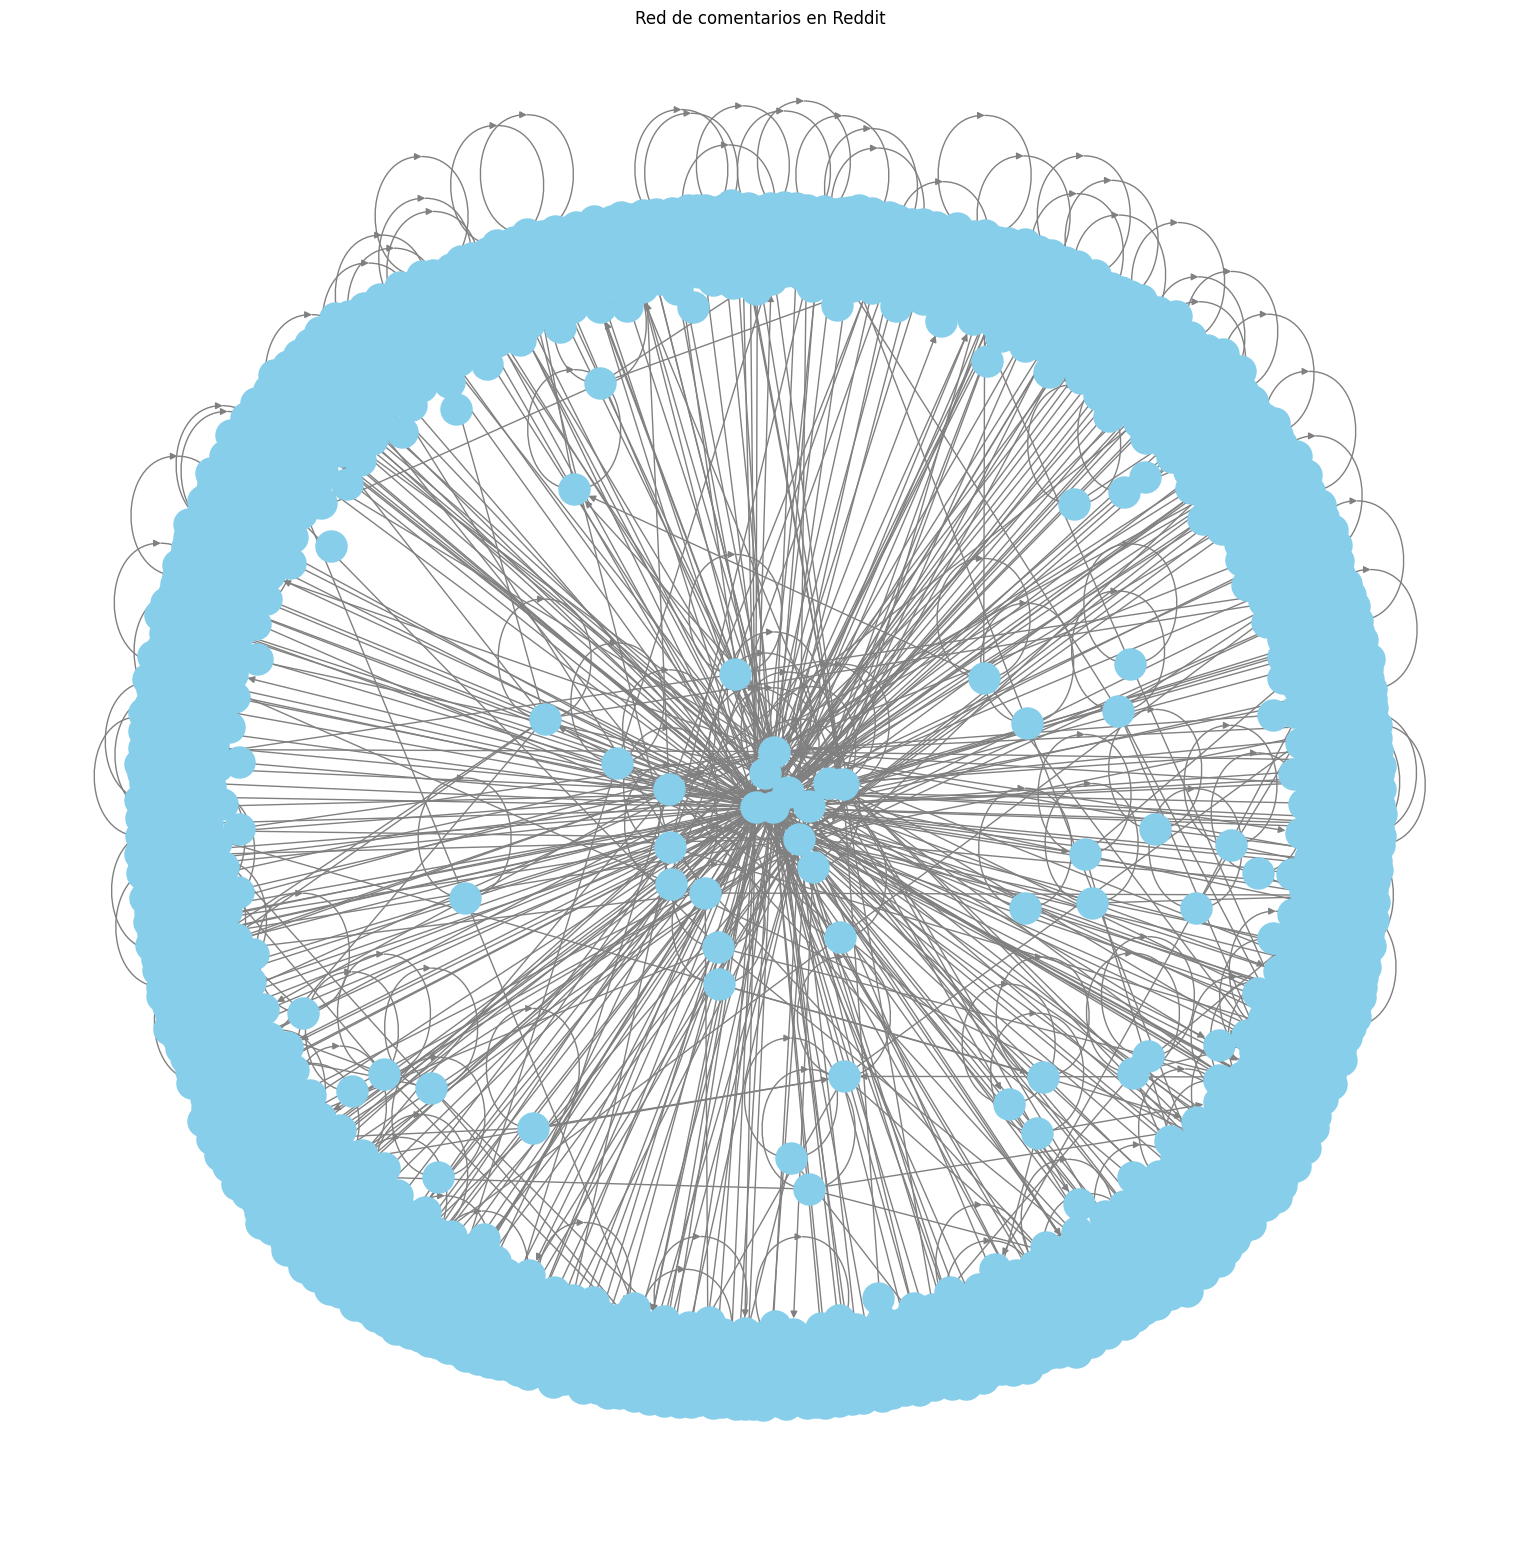

In [8]:
import matplotlib.pyplot as plt

# Plot the network
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.1, iterations=50)

nx.draw(G, pos, with_labels=False, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Red de comentarios en Reddit")
plt.show()


In [9]:
# Número de nodos
num_nodos = G.number_of_nodes()

# Número de enlaces
num_enlaces = G.number_of_edges()

# Grado promedio
grado_promedio = sum(dict(G.degree()).values()) / num_nodos

# Coeficiente de agrupamiento global
coef_agrupamiento_global = nx.average_clustering(G)

# Densidad de la red
densidad = nx.density(G)

# Mostrar resultados
print(f"Número de nodos: {num_nodos}")
print(f"Número de enlaces: {num_enlaces}")
print(f"Grado promedio: {grado_promedio}")
print(f"Coeficiente de agrupamiento global: {coef_agrupamiento_global}")
print(f"Densidad de la red: {densidad}")


Número de nodos: 2443
Número de enlaces: 623
Grado promedio: 0.5100286532951289
Coeficiente de agrupamiento global: 0.0
Densidad de la red: 0.00010442847119064885


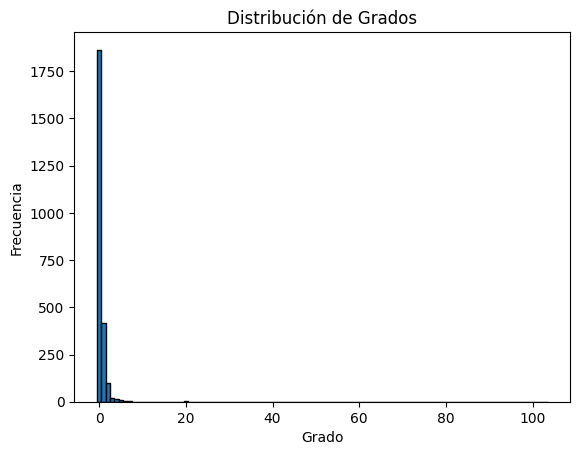

In [10]:
# Distribución de grados
grados = [G.degree(n) for n in G.nodes()]
plt.hist(grados, bins=np.arange(min(grados), max(grados) + 1) - 0.5, edgecolor='black')
plt.title("Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.show()

In [14]:
# Centralidad de grado
centralidad_grado = nx.degree_centrality(G)

# Centralidad de intermediación
centralidad_intermediacion = nx.betweenness_centrality(G)

# Centralidad de cercanía
centralidad_cercania = nx.closeness_centrality(G)

# Mostrar las top 5 nodos más centrales en cada medida
top_5_grado = sorted(centralidad_grado.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_intermediacion = sorted(centralidad_intermediacion.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_cercania = sorted(centralidad_cercania.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Nodos por Centralidad de Grado:", top_5_grado)
print("Top 5 Nodos por Centralidad de Intermediación:", top_5_intermediacion)
print("Top 5 Nodos por Centralidad de Cercanía:", top_5_cercania)

Top 5 Nodos por Centralidad de Grado: [('Scared_Art_7975', 0.04258804258804259), ('AnimusFlux', 0.03931203931203932), ('keinebezeichnung', 0.018837018837018837), ('seth928', 0.018427518427518427), ('Humble-Plankton2217', 0.011466011466011467)]
Top 5 Nodos por Centralidad de Intermediación: [('PhoneImmediate7301', 3.522944940396804e-06), ('Visible_Day9146', 2.0131113945124595e-06), ('Trending-New', 1.0065556972562297e-06), ('LoserBigly', 1.0065556972562297e-06), ('CustomerRemarkable97', 1.0065556972562297e-06)]
Top 5 Nodos por Centralidad de Cercanía: [('tarkthesharkjr', 0.0018241381877745512), ('theDawckta', 0.0012285012285012285), ('redpandaeater', 0.0012285012285012285), ('stigma_wizard', 0.0011375011375011376), ('ThatKaleidoscope8736', 0.0009213759213759214)]


In [15]:
import networkx as nx

# Convertir el grafo dirigido en un grafo no dirigido
G_undirected = G.to_undirected()

# Predicción de enlaces basada en el índice de asignación de recursos
predicciones = list(nx.resource_allocation_index(G_undirected))
predicciones_ordenadas = sorted(predicciones, key=lambda x: x[2], reverse=True)

# Mostrar las predicciones
predicciones_ordenadas[:10]


[('Ok-Service-1127', 'AnimusFlux', 1.5),
 ('merpderpherpburp', 'queasy_logophile', 0.5),
 ('Brisby820', 'Special-Menu-3231', 0.5),
 ('queasy_logophile', 'AppleHumper', 0.5),
 ('justforthis2024', 'm0thership17', 0.5),
 ('occorpattorney', 'Special-Menu-3231', 0.5),
 ('Special-Menu-3231', 'PhoneImmediate7301', 0.5),
 ('bleachedveins', 'Unlucky-tracer', 0.5),
 ('Humble-Plankton2217', 'AnimusFlux', 0.5),
 ('PM5KStrike', 'Maleficent-Topic', 0.5)]

In [17]:
from networkx.algorithms.link_prediction import resource_allocation_index
import networkx as nx

G_undirected = G.to_undirected()

predicciones = list(resource_allocation_index(G_undirected))
predicciones_ordenadas = sorted(predicciones, key=lambda x: x[2], reverse=True)

top_5_predicciones = predicciones_ordenadas[:5]
print("Top 5 Enlaces Más Probables:", top_5_predicciones)


Top 5 Enlaces Más Probables: [('Ok-Service-1127', 'AnimusFlux', 1.5), ('merpderpherpburp', 'queasy_logophile', 0.5), ('Brisby820', 'Special-Menu-3231', 0.5), ('queasy_logophile', 'AppleHumper', 0.5), ('justforthis2024', 'm0thership17', 0.5)]
